In [25]:
import pandas as pd 
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt

from gseapy import enrichr
from sklearn.cluster import AgglomerativeClustering as hclust

In [3]:
data = "/data/ncbi.bak/geo/GPL13534/meta/meth_tools/mana/091020_run/total-TSS1500_median_corr"
data = pd.read_hdf(data,key="data")
data.shape

(20549, 20549)

In [23]:
amer_dm = "/home/xiavan/collab/amer/amer_significant_dmg_TSS1500.csv"
amer_dm = pd.read_csv(amer_dm,index_col=0,header=0)
amer_dm.head()
genes = list(amer_dm.index)

background = "/home/xiavan/collab/amer/amer_sle_betas_imputed_combat_TSS1500_median_DE.csv"
background = pd.read_csv(background,header=0,index_col=0)
b = list(background.index)

In [12]:
data = data.loc[genes][genes]

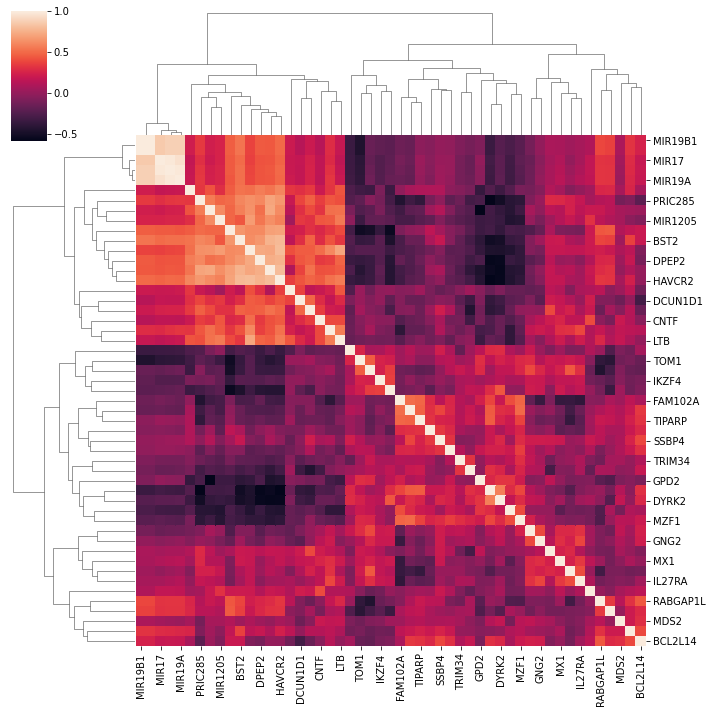

In [17]:
sns.clustermap(data)

In [31]:
clusters = hclust(n_clusters=2).fit_predict(data)

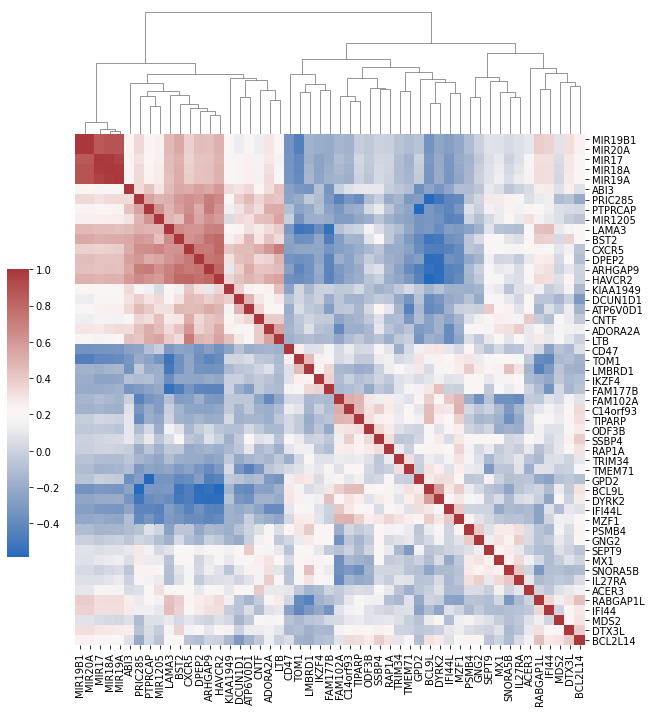

In [114]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = data
correlations_array = np.asarray(data)

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

g = sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(10, 10),cmap=sns.color_palette("vlag", as_cmap=True),yticklabels=True,xticklabels=True)
g.ax_row_dendrogram.set_visible(False)
g.ax_cbar.set_position((0.1, .22, .03, .4))

plt.savefig("/home/xiavan/collab/amer/de_trend_deviation_clustermap.png")
plt.savefig("/home/xiavan/collab/amer/de_trend_deviation_clustermap.svg")

In [70]:
clusters = hclust(n_clusters=3).fit_predict(data)
clusters = pd.DataFrame([clusters,list(data.index)])
clusters = clusters.T
clusters.columns = ["n","gene"]

In [71]:
for x in clusters["n"].unique():
    hits = clusters[clusters.n==x]["gene"]
    print(x,hits.shape,hits.values)

0 (19,) ['IKZF4' 'MDS2' 'SEPT9' 'SSBP4' 'DTX3L' 'BCL2L14' 'MX1' 'ACER3' 'TOM1'
 'SNORA5B' 'RABGAP1L' 'LMBRD1' 'PSMB4' 'IL27RA' 'RAP1A' 'IFI44' 'GNG2'
 'ODF3B' 'FAM177B']
1 (21,) ['KIAA1949' 'CNTF' 'LAMA3' 'CXCR5' 'ABI3' 'BST2' 'ADORA2A' 'PRIC285'
 'DCUN1D1' 'LTB' 'MIR17' 'MIR18A' 'MIR19B1' 'MIR19A' 'MIR20A' 'PTPRCAP'
 'DPEP2' 'ARHGAP9' 'MIR1205' 'ATP6V0D1' 'HAVCR2']
2 (11,) ['CD47' 'IFI44L' 'MZF1' 'GPD2' 'TRIM34' 'FAM102A' 'BCL9L' 'TMEM71' 'DYRK2'
 'C14orf93' 'TIPARP']


/usr/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='coef', ylabel='Density'>

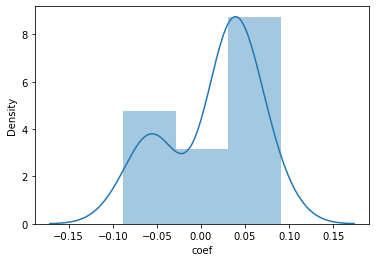

In [123]:
sns.distplot(amer_dm.loc[genes].coef)

In [94]:
genes = list(clusters[clusters["n"]==1].gene.values)
gb = list(clusters[clusters["n"]!=1].gene.values)

In [144]:
#hits = amer_dm.loc[genes]
up = amer_dm[amer_dm.coef>0].index
down = amer_dm[amer_dm.coef<0].index


In [145]:
up

Index(['KIAA1949', 'MDS2', 'CNTF', 'SEPT9', 'LAMA3', 'CD47', 'CXCR5', 'SSBP4',
       'ABI3', 'MZF1', 'GPD2', 'ADORA2A', 'PRIC285', 'DCUN1D1', 'FAM102A',
       'ACER3', 'LTB', 'TOM1', 'BCL9L', 'SNORA5B', 'PTPRCAP', 'DPEP2',
       'LMBRD1', 'ARHGAP9', 'MIR1205', 'PSMB4', 'ATP6V0D1', 'IL27RA', 'RAP1A',
       'TMEM71', 'DYRK2', 'C14orf93', 'TIPARP', 'HAVCR2'],
      dtype='object')

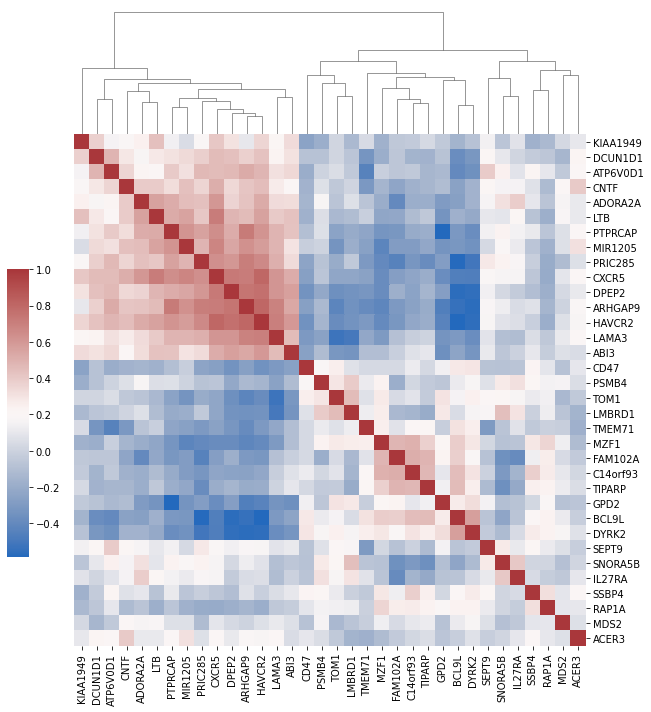

In [146]:
correlations = data.loc[up][up]
correlations_array = np.asarray(correlations)

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

g = sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(10, 10),cmap=sns.color_palette("vlag", as_cmap=True),yticklabels=True,xticklabels=True)
g.ax_row_dendrogram.set_visible(False)
g.ax_cbar.set_position((0.1, .22, .03, .4))
plt.savefig("/home/xiavan/collab/amer/dm_up_trend_deviation_clustermap.png")
plt.savefig("/home/xiavan/collab/amer/dm_up_trend_deviation_clustermap.svg")

In [156]:
toclust = data.loc[up][up]
clusters = hclust(n_clusters=3).fit_predict(toclust)
clusters = pd.DataFrame([clusters,list(toclust.index)])
clusters = clusters.T
clusters.columns = ["n","gene"]

for x in clusters["n"].unique():
    hits = clusters[clusters.n==x]["gene"]
    print(x,hits.shape,hits.values)

1 (15,) ['KIAA1949' 'CNTF' 'LAMA3' 'CXCR5' 'ABI3' 'ADORA2A' 'PRIC285' 'DCUN1D1'
 'LTB' 'PTPRCAP' 'DPEP2' 'ARHGAP9' 'MIR1205' 'ATP6V0D1' 'HAVCR2']
0 (10,) ['MDS2' 'SEPT9' 'SSBP4' 'ACER3' 'TOM1' 'SNORA5B' 'LMBRD1' 'PSMB4' 'IL27RA'
 'RAP1A']
2 (9,) ['CD47' 'MZF1' 'GPD2' 'FAM102A' 'BCL9L' 'TMEM71' 'DYRK2' 'C14orf93'
 'TIPARP']


In [159]:
#ucluster 
uc = enrichr(gene_list=list(clusters[clusters.n==1].gene.unique()),background=b,gene_sets="GO_Biological_Process_2018")
uc.res2d.head()

2021-02-24 15:57:01,888 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,astrocyte activation (GO:0048143),1/6,0.004492,0.077905,0,0,285.428571,1542.867593,CNTF
1,GO_Biological_Process_2018,response to increased oxygen levels (GO:0036296),1/7,0.005239,0.077905,0,0,237.845238,1249.077685,ATP6V0D1
2,GO_Biological_Process_2018,cellular response to oxygen levels (GO:0071453),1/9,0.006731,0.077905,0,0,178.366071,892.013120,ATP6V0D1
3,GO_Biological_Process_2018,regulation of axon regeneration (GO:0048679),1/10,0.007476,0.077905,0,0,158.539683,776.212425,CNTF
4,GO_Biological_Process_2018,astrocyte development (GO:0014002),1/10,0.007476,0.077905,0,0,158.539683,776.212425,CNTF


In [162]:
#ucluster 
uc = enrichr(gene_list=list(clusters[clusters.n==1].gene.unique()),background=b,gene_sets="KEGG_2019_Human")
uc.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Cytokine-cytokine receptor interaction,3/294,0.001255,0.029995,0,0,16.919244,113.032562,CNTF;CXCR5;LTB
1,KEGG_2019_Human,Rheumatoid arthritis,2/91,0.002069,0.029995,0,0,34.392394,212.574727,LTB;ATP6V0D1
2,KEGG_2019_Human,Collecting duct acid secretion,1/27,0.020067,0.164826,0,0,54.832418,214.323504,ATP6V0D1
3,KEGG_2019_Human,Human papillomavirus infection,2/330,0.024734,0.164826,0,0,9.219981,34.110085,LAMA3;ATP6V0D1
4,KEGG_2019_Human,Vibrio cholerae infection,1/50,0.036863,0.164826,0,0,29.061224,95.917716,ATP6V0D1


In [ ]:
#ucluster 
uc = enrichr(gene_list=list(clusters[clusters.n==1].gene.unique()),background=b,gene_sets="GO_Biological_Process_2018")
uc.res2d.head()

In [147]:
u = enrichr(gene_list=list(up),background=b,gene_sets="GO_Biological_Process_2018")
u.res2d.head()

2021-02-24 15:52:05,034 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,peptide transport (GO:0015833),2/41,0.002207,0.165112,0,0,31.934295,195.320404,RAP1A;TOM1
1,GO_Biological_Process_2018,neutrophil degranulation (GO:0043312),4/479,0.008534,0.165112,0,0,5.471158,26.063230,ARHGAP9;RAP1A;TOM1;CD47
2,GO_Biological_Process_2018,neutrophil activation involved in immune respo...,4/483,0.008781,0.165112,0,0,5.424356,25.685166,ARHGAP9;RAP1A;TOM1;CD47
3,GO_Biological_Process_2018,neutrophil mediated immunity (GO:0002446),4/487,0.009033,0.165112,0,0,5.378330,25.314909,ARHGAP9;RAP1A;TOM1;CD47
4,GO_Biological_Process_2018,astrocyte activation (GO:0048143),1/6,0.010158,0.165112,0,0,120.975758,555.218565,CNTF


In [161]:
u = enrichr(gene_list=list(up),background=b,gene_sets="KEGG_2019_Human")
u.res2d.head()

2021-02-24 15:57:52,709 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Cytokine-cytokine receptor interaction,4/294,0.001499,0.067448,0,0,9.046437,58.829533,CNTF;CXCR5;LTB;IL27RA
1,KEGG_2019_Human,ECM-receptor interaction,2/82,0.008556,0.156753,0,0,15.535937,73.968257,LAMA3;CD47
2,KEGG_2019_Human,Rheumatoid arthritis,2/91,0.010450,0.156753,0,0,13.958567,63.666869,LTB;ATP6V0D1
3,KEGG_2019_Human,JAK-STAT signaling pathway,2/162,0.030880,0.226163,0,0,7.736719,26.905569,CNTF;IL27RA
4,KEGG_2019_Human,Vitamin digestion and absorption,1/24,0.040035,0.226163,0,0,26.275362,84.554425,LMBRD1


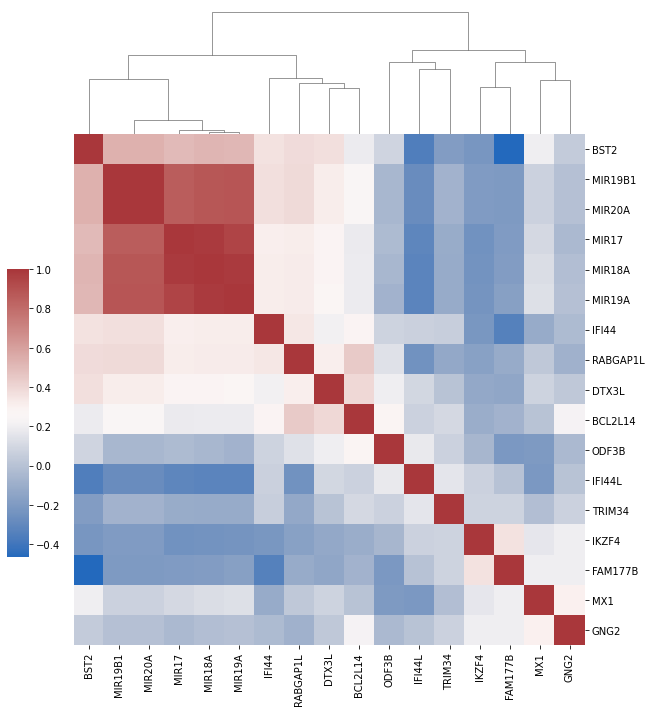

In [149]:
correlations = data.loc[down][down]
correlations_array = np.asarray(correlations)

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

g = sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(10, 10),cmap=sns.color_palette("vlag", as_cmap=True),yticklabels=True,xticklabels=True)
g.ax_row_dendrogram.set_visible(False)
g.ax_cbar.set_position((0.1, .22, .03, .4))

plt.savefig("/home/xiavan/collab/amer/dm_down_trend_deviation_clustermap.png")
plt.savefig("/home/xiavan/collab/amer/dm_down_trend_deviation_clustermap.svg")

In [164]:
toclust = data.loc[down][down]
clusters = hclust(n_clusters=2).fit_predict(toclust)
clusters = pd.DataFrame([clusters,list(toclust.index)])
clusters = clusters.T
clusters.columns = ["n","gene"]

for x in clusters["n"].unique():
    hits = clusters[clusters.n==x]["gene"]
    print(x,hits.shape,hits.values)

1 (7,) ['IKZF4' 'IFI44L' 'TRIM34' 'MX1' 'GNG2' 'ODF3B' 'FAM177B']
0 (10,) ['DTX3L' 'BCL2L14' 'BST2' 'MIR17' 'MIR18A' 'MIR19B1' 'MIR19A' 'MIR20A'
 'RABGAP1L' 'IFI44']


In [176]:
da = list(clusters[clusters.n==0].gene.unique())
db = list(clusters[clusters.n==1].gene.unique())

In [172]:
dac = enrichr(gene_list=da,background=b,gene_sets="GO_Biological_Process_2018")
dac.res2d

2021-02-24 16:02:32,636 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,regulation of protein localization to early en...,1/6,0.002997,0.061970,0,0,444.111111,2580.411794,DTX3L
1,GO_Biological_Process_2018,positive regulation of protein localization to...,1/6,0.002997,0.061970,0,0,444.111111,2580.411794,DTX3L
2,GO_Biological_Process_2018,positive regulation of protein localization to...,1/6,0.002997,0.061970,0,0,444.111111,2580.411794,DTX3L
3,GO_Biological_Process_2018,positive regulation of chromatin binding (GO:0...,1/8,0.003994,0.061970,0,0,317.190476,1751.859055,DTX3L
4,GO_Biological_Process_2018,histone H2B ubiquitination (GO:0033523),1/10,0.004990,0.061970,0,0,246.679012,1307.486550,DTX3L
...,...,...,...,...,...,...,...,...,...,...
78,GO_Biological_Process_2018,cytokine-mediated signaling pathway (GO:0019221),1/633,0.275077,0.289005,0,0,3.403305,4.392661,BST2
79,GO_Biological_Process_2018,positive regulation of gene expression (GO:001...,1/771,0.325117,0.337309,0,0,2.773449,3.116160,DTX3L
80,GO_Biological_Process_2018,regulation of apoptotic process (GO:0042981),1/815,0.340406,0.348811,0,0,2.617527,2.820692,BCL2L14
81,GO_Biological_Process_2018,"positive regulation of transcription, DNA-temp...",1/1120,0.438096,0.443438,0,0,1.873796,1.546478,DTX3L


In [173]:
dac = enrichr(gene_list=da,background=b,gene_sets="KEGG_2019_Human")
dac.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,MicroRNAs in cancer,5/299,1.711669e-07,6.846678e-07,0,0,66.993197,1043.795983,MIR19B1;MIR20A;MIR17;MIR18A;MIR19A
1,KEGG_2019_Human,Notch signaling pathway,1/48,2.374757e-02,4.749514e-02,0,0,47.146572,176.341144,DTX3L
2,KEGG_2019_Human,Human immunodeficiency virus 1 infection,1/212,1.011055e-01,1.348073e-01,0,0,10.415482,23.868026,BST2
3,KEGG_2019_Human,Herpes simplex virus 1 infection,1/492,2.205234e-01,2.205234e-01,0,0,4.412537,6.670660,BST2


In [179]:
dbc = enrichr(gene_list=db,background=b,gene_sets="GO_Biological_Process_2018")
dbc.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,cellular response to monoamine stimulus (GO:00...,1/6,0.002098,0.018877,0,0,666.266667,4108.590826,GNG2
1,GO_Biological_Process_2018,response to catecholamine (GO:0071869),1/6,0.002098,0.018877,0,0,666.266667,4108.590826,GNG2
2,GO_Biological_Process_2018,protein oligomerization (GO:0051259),2/217,0.002374,0.018877,0,0,36.796279,222.365375,IKZF4;TRIM34
3,GO_Biological_Process_2018,adenylate cyclase-activating dopamine receptor...,1/7,0.002448,0.018877,0,0,555.194444,3338.153583,GNG2
4,GO_Biological_Process_2018,response to type I interferon (GO:0034340),1/7,0.002448,0.018877,0,0,555.194444,3338.153583,MX1


In [180]:
dbc = enrichr(gene_list=db,background=b,gene_sets="KEGG_2019_Human")
dbc.res2d.head()

2021-02-24 16:04:14,858 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,GABAergic synapse,1/89,0.030742,0.088885,0,0,37.698864,131.272689,GNG2
1,KEGG_2019_Human,Morphine addiction,1/91,0.031423,0.088885,0,0,36.857407,127.534574,GNG2
2,KEGG_2019_Human,Circadian entrainment,1/97,0.033465,0.088885,0,0,34.543403,117.353010,GNG2
3,KEGG_2019_Human,Cholinergic synapse,1/112,0.038553,0.088885,0,0,29.852853,97.192549,GNG2
4,KEGG_2019_Human,Serotonergic synapse,1/113,0.038891,0.088885,0,0,29.584821,96.061365,GNG2


In [99]:
e = enrichr(gene_list=list(clusters.gene.unique()),background=b,gene_sets="GO_Biological_Process_2018")
e.res2d.head()

2021-02-23 19:06:36,944 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,cytokine-mediated signaling pathway (GO:0019221),7/633,0.001063,0.197503,0,0,4.910725,33.623236,BST2;CNTF;PSMB4;MX1;LTB;IL27RA;TRIM34
1,GO_Biological_Process_2018,regulation of ubiquitin-protein transferase ac...,2/31,0.002828,0.197503,0,0,28.036594,164.528682,DTX3L;DCUN1D1
2,GO_Biological_Process_2018,peptide transport (GO:0015833),2/41,0.004906,0.197503,0,0,20.837258,110.798805,RAP1A;TOM1
3,GO_Biological_Process_2018,cellular response to organic cyclic compound (...,3/135,0.004944,0.197503,0,0,9.383049,49.819358,GNG2;RAP1A;TIPARP
4,GO_Biological_Process_2018,protein heterooligomerization (GO:0051291),2/49,0.006945,0.197503,0,0,17.283543,85.894960,SEPT9;IKZF4


In [95]:
e = enrichr(gene_list=gb,background=b,gene_sets="GO_Biological_Process_2018")
e.res2d.head()

2021-02-23 18:10:59,005 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,cellular response to organic cyclic compound (...,3/135,0.001069,0.132009,0,0,16.698653,114.242513,GNG2;RAP1A;TIPARP
1,GO_Biological_Process_2018,peptide transport (GO:0015833),2/41,0.001720,0.132009,0,0,36.503663,232.364541,RAP1A;TOM1
2,GO_Biological_Process_2018,protein heterooligomerization (GO:0051291),2/49,0.002448,0.132009,0,0,30.278116,182.043737,SEPT9;IKZF4
3,GO_Biological_Process_2018,protein oligomerization (GO:0051259),3/217,0.004121,0.132009,0,0,10.257529,56.331420,SEPT9;IKZF4;TRIM34
4,GO_Biological_Process_2018,regulation of protein localization to early en...,1/6,0.008967,0.132009,0,0,137.689655,649.091952,DTX3L


In [89]:
e = enrichr(gene_list=genes,background=b,gene_sets="GO_Biological_Process_2018")
e.res2d.head()

2021-02-23 18:08:23,285 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,astrocyte activation (GO:0048143),1/6,0.006284,0.123255,0,0,199.740000,1012.625496,CNTF
1,GO_Biological_Process_2018,response to increased oxygen levels (GO:0036296),1/7,0.007328,0.123255,0,0,166.441667,818.238307,ATP6V0D1
2,GO_Biological_Process_2018,cellular response to oxygen levels (GO:0071453),1/9,0.009412,0.123255,0,0,124.818750,582.373136,ATP6V0D1
3,GO_Biological_Process_2018,regulation of axon regeneration (GO:0048679),1/10,0.010453,0.123255,0,0,110.944444,506.005305,CNTF
4,GO_Biological_Process_2018,astrocyte development (GO:0014002),1/10,0.010453,0.123255,0,0,110.944444,506.005305,CNTF


In [90]:
e = enrichr(gene_list=genes,background=b,gene_sets="GO_Molecular_Function_2018")
e.res2d.head()

2021-02-23 18:08:41,574 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2018,interleukin-6 receptor binding (GO:0005138),1/7,0.007328,0.062654,0,0,166.441667,818.238307,CNTF
1,GO_Molecular_Function_2018,purinergic receptor activity (GO:0035586),1/8,0.008371,0.062654,0,0,142.657143,682.334006,ADORA2A
2,GO_Molecular_Function_2018,"hydrogen-exporting ATPase activity, phosphoryl...",1/9,0.009412,0.062654,0,0,124.818750,582.373136,ATP6V0D1
3,GO_Molecular_Function_2018,dipeptidase activity (GO:0016805),1/10,0.010453,0.062654,0,0,110.944444,506.005305,DPEP2
4,GO_Molecular_Function_2018,metalloendopeptidase inhibitor activity (GO:00...,1/12,0.012531,0.062654,0,0,90.763636,397.505318,BST2


In [116]:
e = enrichr(gene_list=genes,background=b,gene_sets="KEGG_2019_Human")
e  = e.res2d
e = e[e["Adjusted P-value"]<0.05]
e.head()
#e.res2d.head()to_csv("/home/xiavan/collab/amer/de_microrna_enrichment.csv")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,MicroRNAs in cancer,5/299,0.000012,0.000386,0,0,20.923682,236.948130,MIR19B1;MIR20A;MIR17;MIR18A;MIR19A
1,KEGG_2019_Human,Cytokine-cytokine receptor interaction,3/294,0.003437,0.043355,0,0,11.276060,63.971697,CNTF;CXCR5;LTB
2,KEGG_2019_Human,Rheumatoid arthritis,2/91,0.004065,0.043355,0,0,23.524542,129.513159,LTB;ATP6V0D1


In [117]:
e.to_csv("/home/xiavan/collab/amer/de_microrna_enrichment.csv")

In [96]:
e = enrichr(gene_list=gb,background=b,gene_sets="KEGG_2019_Human")
e.res2d.head()

2021-02-23 18:11:23,634 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Chemokine signaling pathway,2/190,0.032809,0.312458,0,0,7.515957,25.682313,GNG2;RAP1A
1,KEGG_2019_Human,Vitamin digestion and absorption,1/24,0.035406,0.312458,0,0,29.905547,99.911013,LMBRD1
2,KEGG_2019_Human,Ras signaling pathway,2/232,0.047114,0.312458,0,0,6.130435,18.729659,GNG2;RAP1A
3,KEGG_2019_Human,Proteasome,1/45,0.065389,0.312458,0,0,15.615987,42.591068,PSMB4
4,KEGG_2019_Human,Sphingolipid metabolism,1/47,0.068197,0.312458,0,0,14.935532,40.107182,ACER3


In [ ]:
#no signifncant enrihcments in rest of set 